In [1]:
%autosave 60

Autosaving every 60 seconds


# Loan Data Analysis & Visualisation



## Table of Contents

- [Introduction](#intro)
 - [Load Data](#load)

- [Exploratory Data Analysis](#exploratry)
   - [Univariate Analysis](#uni)
     - [Summary](#uni_sum)
   - [Bivariate Analysis](#bi)
     - [Summary](#bi_sum)
   - [Multivariate Analysis](#multi)
- [Clean](#clean)
- [Store](#store)
- [Analysing and Visualising](#analyse)
  

 //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<a id='intro'></a>
## Introduction
This dataset contains complete loan data for all loans issued through 2005-2014, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file is a matrix of about 113 thousand observations and 75 variables. A data dictionary is provided in a separate file.

First step is to import required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='load'></a>
### Load Data
The data is stored in a csv file which should be loaded.

In [4]:
loan=pd.read_csv('prosperLoanData.csv')

In [51]:
loan.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [62]:
sorted_loan=loan.sort_values(by=['ListingCreationDate']);
loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<a id='exploratory'></a>
## Exploratrory Data Analysis
This section is to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from simple univariate relationships up through multivariate relationships.

<a id='uni'></a>
## Univariate Analysis
In this section, we perform some preliminary exploration of our dataset. we run some summaries of the data and create univariate plots to understand the structure of the individual variables in our dataset.

In [79]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


We cannot see all the variables as the data contains many variables. we can split the datafram into 4.

In [5]:
df1=loan.iloc[:,0:20]
df2=loan.iloc[:,20:40]
df3=loan.iloc[:,40:60]
df4=loan.iloc[:,60:82]

In [42]:
df1.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed


In [7]:
list(loan);

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

Many null values can be seen in above table which can be plotted as below:

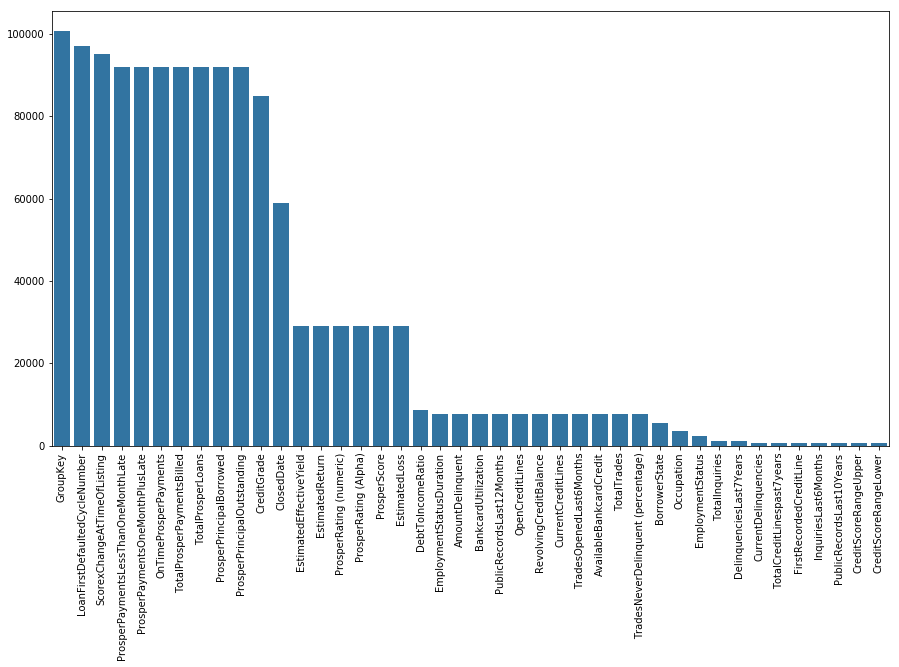

In [124]:
base_color = sb.color_palette()[0]
na_counts = loan.isna().sum().sort_values(ascending=False)
na_counts=na_counts[na_counts.values>100]
plt.figure(figsize=(15,8))
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation=90);

There are some variables that have many NaN records whih are not useful for our analysis; so they can be dropped, such as:<br> GroupKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPrincipalOutstanding <br>
ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed<br> 

In [13]:
dropp=['GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPrincipalOutstanding',
       'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed','CreditGrade']
loan=loan.drop(dropp,axis=1,inplace=True)

Let's have a look at the Loans Status. About 600 thousand loans are still current. About 200 thousand are fully paid and about 45 thousand loans are charged off.

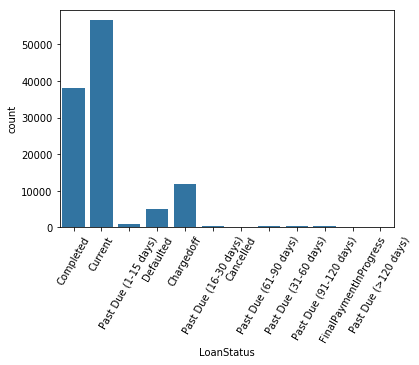

In [6]:
sb.countplot(data = loan, x = 'LoanStatus', color = base_color);
plt.xticks(rotation=60);

We can sum all the past due values into one Late category as follow:

In [43]:
status=loan.LoanStatus.value_counts()
status

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [64]:
stat=status[['Current','Completed','Chargedoff','Defaulted','FinalPaymentInProgress','Cancelled']]
stat['Late']=status[status.index.str.contains('Past')].values.sum()

In [76]:
stat=stat.sort_values(ascending=False)

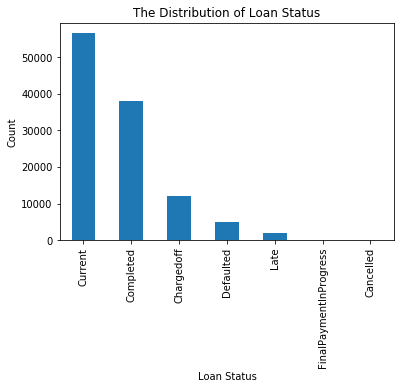

In [106]:
stat.plot(kind='bar',color = base_color)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('The Distribution of Loan Status');

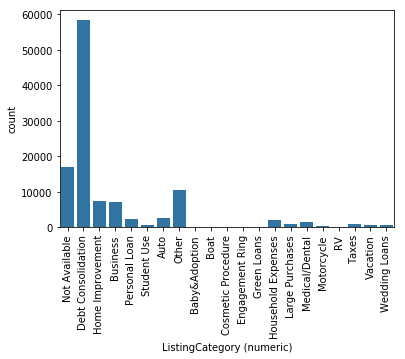

In [44]:
ax=sb.countplot(data = loan, x = 'ListingCategory (numeric)', color = base_color);
plt.xticks(rotation=60);
tic=['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan',
      'Student Use','Auto', 'Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring',
      'Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV',
     'Taxes','Vacation', 'Wedding Loans']
ax.set_xticklabels(tic,rotation=90);
# plt.xticks(labels=tic)

Text(0.5, 1.0, 'The Distribution of Given Loans')

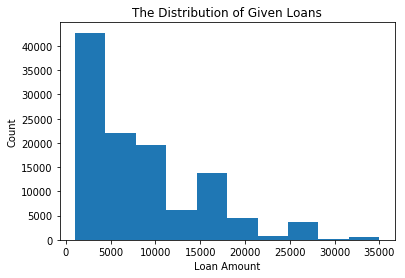

In [7]:
plt.hist(data = loan, x = 'LoanOriginalAmount');
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('The Distribution of Given Loans')

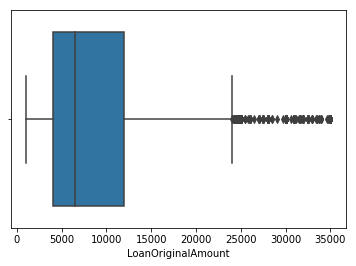

In [98]:
sb.boxplot(data=loan,x='LoanOriginalAmount');

In [80]:
loan.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

As we can see from the table above, the loan amount varies between 1000 and 35000. The mean of the loan amount is 8333 and as the boxplot suggests, the majority of the loans are somewhere between 4000 - 12000.

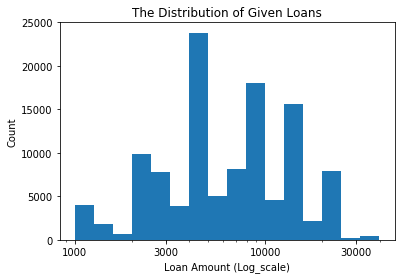

In [90]:
bin_edges = 10 ** np.arange(3, np.log10(loan.LoanOriginalAmount.max())+0.1, 0.1)
plt.hist(loan.LoanOriginalAmount, bins = bin_edges)
plt.xscale('log')
plt.xlabel('Loan Amount (Log_scale)')
plt.ylabel('Count')
plt.title('The Distribution of Given Loans')
tick_locs = [1000, 3000, 10000, 30000]
plt.xticks(tick_locs, tick_locs);

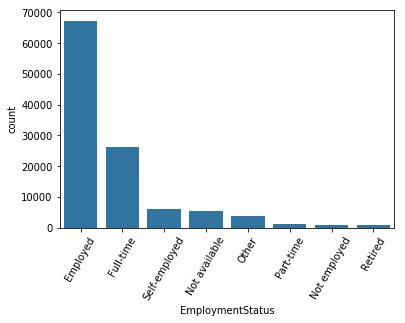

In [6]:
order=loan.EmploymentStatus.value_counts().index
sb.countplot(data = loan, x = 'EmploymentStatus', color = base_color,order=order);
plt.xticks(rotation=60);

In [22]:
loan.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

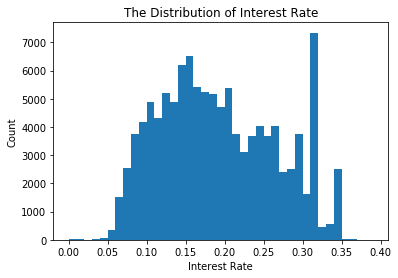

In [33]:
binss=np.arange(0,0.4,0.01)
plt.hist(data = loan, x = 'BorrowerRate',bins=binss);
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('The Distribution of Interest Rate');

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

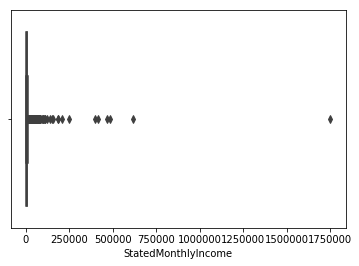

In [37]:
sb.boxplot(data=loan,x='StatedMonthlyIncome');
loan.StatedMonthlyIncome.describe()

Most income values sit between 3000 to 7000' and there are many outliers which result in unsual distribution as follow:

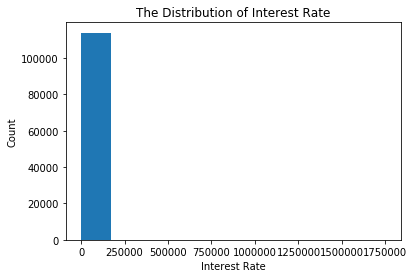

In [41]:
# binss=np.arange(0,20000,500)
plt.hist(data = loan, x = 'StatedMonthlyIncome')#,bins=binss);
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('The Distribution of Interest Rate');

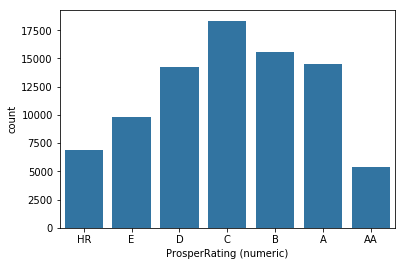

In [49]:
ax2=sb.countplot(data = loan, x = 'ProsperRating (numeric)', color = base_color);
# plt.xticks(rotation=60);

ticr=['HR','E', 'D', 'C', 'B', 'A','AA']
ax2.set_xticklabels(ticr);

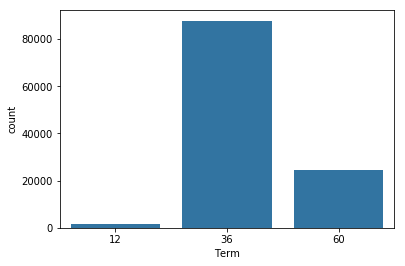

In [50]:
sb.countplot(data = loan, x = 'Term', color = base_color);


In [67]:
timestamp=sorted_loan.ListingCreationDate.apply(lambda x: x.split('.')[0])
sorted_loan.ListingCreationDate=pd.to_datetime(timestamp)

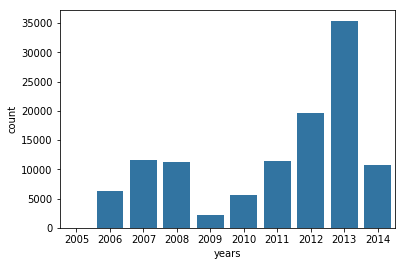

In [88]:
sorted_loan['years']= sorted_loan.ListingCreationDate.dt.year
sb.countplot(data = sorted_loan, x = 'years', color = base_color);

<a id='uni_sum'></a>
### Summary
A number of columns with category type and a the rest are continuous or discrete form of numerical values. Among the numeric fields, the Loan Amount, Interest Rate (Borrower Rate) and Monthly Income are of particular interest. Of all the categorical fields, Prosper Rating, Employment status, Home ownership, Loan Status, listing category and Term are interesting. some odd distributions found in the dataset are as follows:

- The distribution of interest rate looks normal except an odd pick around 0.32.
- Monthly income includes many outlier and the distribution shows a single column which should be changed with log scale.
- Loan amount is right skewed which if we use log scale we end up with normally look distribution with picks on some specefic values.


<a id='bi'></a>
## Bivariate Analysis

I was particularly interested in the relationship between loan amount and the following fields:
- Home Ownership
- Occupation
- Employment Length
- Loan Status
- Interest Rate
- Monthly Income
- purpose (Listing Category)


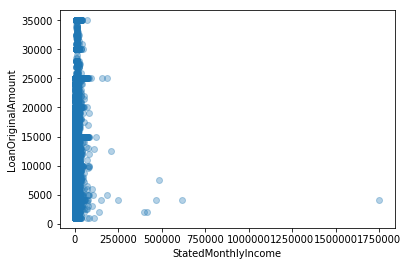

In [29]:
sb.regplot(data = loan, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', fit_reg = False,
           scatter_kws = {'alpha' : 1/3});

Obviously the outliers cause the plots to look unusual.So it is decided to remove outliers from the data. the summary statistics of income shows interquartile range. But we consider outliers are those larger than 2 times of 3rd quartile.

In [93]:
q75=loan.StatedMonthlyIncome.quantile(0.75)
lim=q75*2
incomes=loan[loan.StatedMonthlyIncome < lim]

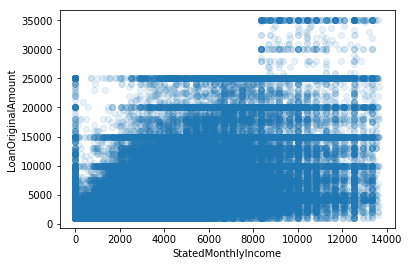

In [94]:
sb.regplot(data = incomes, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', fit_reg = False,
           scatter_kws = {'alpha' : 0.1});

It seems a heatmap would be a better choice for plot. But it can be seen that the dark lines over absolute values shows the trend for given loans vs income.

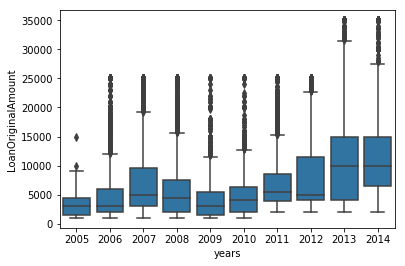

In [90]:
sb.boxplot(data=sorted_loan,x='years',y='LoanOriginalAmount', color=base_color);

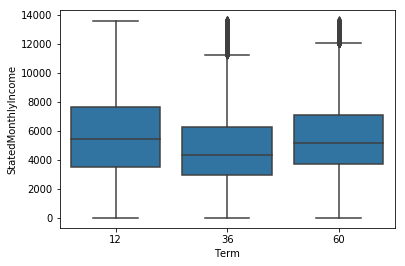

In [95]:
sb.boxplot(data=incomes,x='Term',y='StatedMonthlyIncome', color=base_color);

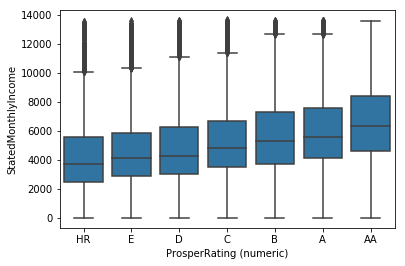

In [100]:
ax3=sb.boxplot(data=incomes,x='ProsperRating (numeric)',y='StatedMonthlyIncome', color=base_color);

ax3.set_xticklabels(ticr);

<a id='bi_sum'></a>
### Summary
The mean loan amount vary trough years. The minimum mean in 2009 and the maximum one is in 2013 and 2014. Moreover, we can see that with less amount of income it is more likely the term is given as 36 months. It can be seen that loans more than 25000 are only given to borrowers with monthly income more than 8000.It is noticed that employed people are more likely to get loan than others.
It can be seen that the borrower with higher income get better rating.
<a id='multi'></a>
## Multivariate Analysis